## PI - DATA ANALYST

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## ACCESOS TECNOLOGIA

Verificamos los valores de las columnas del DataFrame

In [3]:
accesos_tecnologia =pd.read_csv ('datasets/accesos/Internet_Accesos-por-tecnologia.csv')
accesos_tecnologia.head(5)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021


Verificamos columnas y sus tipos de datos

In [4]:
accesos_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     object 
 3   Cablemodem    35 non-null     object 
 4   Fibra óptica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.6+ KB


Verificamos número de filas y columnas del dataset

In [5]:
accesos_tecnologia.shape

(35, 9)

Analizamos distribucion de valores numericos

In [6]:
accesos_tecnologia.describe()

,Año,Trimestre,Wireless,Otros
count,35.000000,35.000000,35.000000,35.000000
mean,2017.885714,2.457143,248.280029,147.431086
std,2.564135,1.120474,174.354293,85.868717
min,2014.000000,1.000000,70.749000,54.300000
25%,2016.000000,1.500000,85.107500,62.763500
50%,2018.000000,2.000000,194.267000,100.554000
75%,2020.000000,3.000000,394.963000,247.918500
max,2022.000000,4.000000,557.110000,265.328000


Verificamos los valores nulos de cada columna

In [7]:
accesos_tecnologia.isnull().sum()

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64

# Análisis univariante

Mostramos distribucion de los datos numéricos de variable total

In [26]:
def eliminar_puntos_y_convertir_a_entero(valor):
    valor_sin_puntos = str(valor).replace('.', '')
    valor_entero = int(valor_sin_puntos)
    return valor_entero

# Aplicar la función a la columna 'Total'
accesos_tecnologia['Total'] = accesos_tecnologia['Total'].apply(eliminar_puntos_y_convertir_a_entero)

In [32]:
accesos_tecnologia['Total'].describe()

count    3.500000e+01
mean     8.297800e+06
std      1.399611e+06
min      6.398398e+06
25%      7.057455e+06
50%      8.110444e+06
75%      9.260442e+06
max      1.109113e+07
Name: Total, dtype: float64

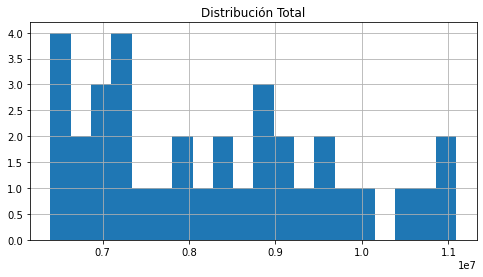

In [35]:
plt.figure(figsize=(8, 4))
plt.hist(accesos_tecnologia['Total'], bins=20)
plt.title('Distribución Total')
plt.grid()
plt.show()

Text(0, 0.5, 'Frecuencia')

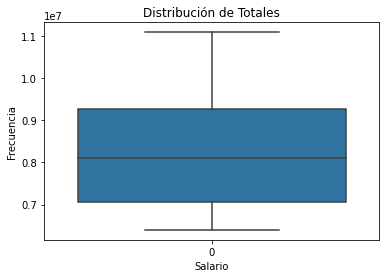

In [38]:
# Crear un gráfico de caja de la columna 'Total'
sns.boxplot(accesos_tecnologia['Total'])
# Agregar titulo y etiquetas de los ejes
plt.title('Distribución de Totales')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
# Mostrar el

trazar una línea vertical en el valor medio de los datos para verificar los valores mínimo y máximo de los datos.

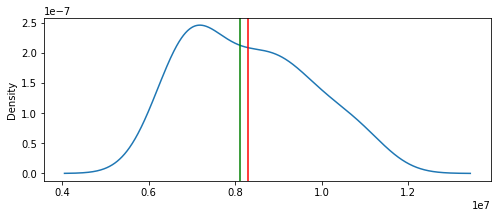

In [39]:
ax = accesos_tecnologia['Total'].plot(kind='density', figsize=(8,3)) 
ax.axvline(accesos_tecnologia['Total'].mean(), color='red')
ax.axvline(accesos_tecnologia['Total'].median(), color='green')

## Análisis multivariado

Relacion entre total de accesos por año

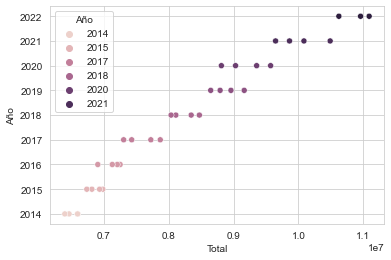

<Figure size 2880x1440 with 0 Axes>

In [64]:
sns.scatterplot(x="Total", y="Año", data=accesos_tecnologia, hue="Año")
#plt.xticks(rotation=90)
plt.figure(figsize=(40, 20))
plt.show()

Graficamos matriz de diagramas de dispersión para cada par de columnas en un DataFrame, para visualizar la relación entre diferentes variables, segun columna trimestre

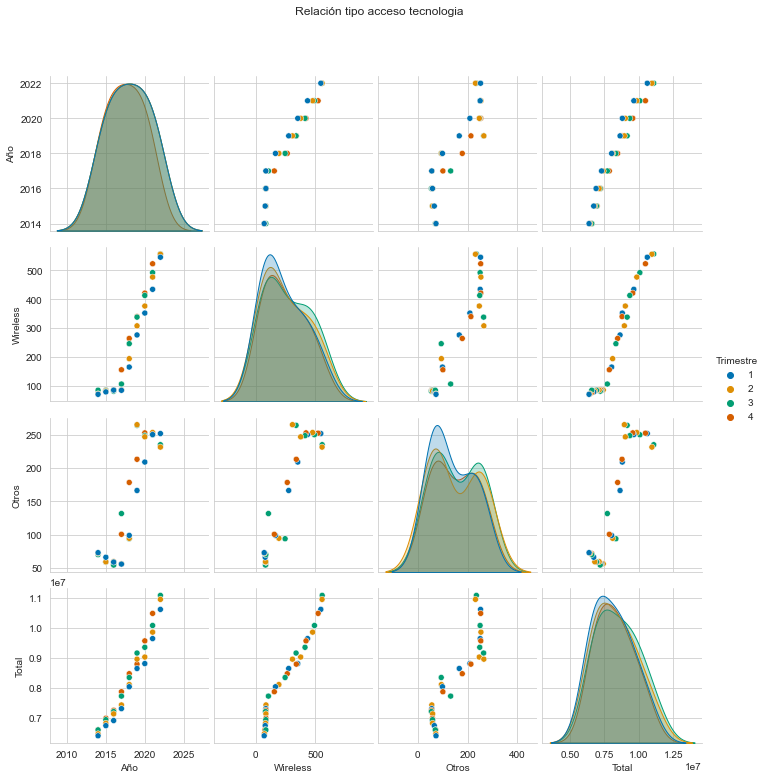

In [43]:
sns.set_style("whitegrid")
g = sns.pairplot(accesos_tecnologia, hue="Trimestre", palette="colorblind")
g.fig.suptitle("Relación tipo acceso tecnologia", y=1.08)
plt.xlabel("Plataformas")
plt.ylabel("Puntajes")
plt.show()